In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.model_selection import learning_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.inspection import permutation_importance

In [2]:
data_df = pd.read_csv("C:/Users/User/Desktop/proj_indiv_immoblier_septembre/train_data.csv",sep=',')
#supprimer la colonne unnamed
data_df.drop(data_df.columns[0],axis=1,inplace=True)


In [3]:
#les statistiques éléméntaires des variables 
data_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
#le nombre de doublons
data_df.duplicated().sum() 


0

In [5]:
#pour supprimer
data_df.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [6]:
# supprimer les données manquantes
print("avant",data_df.shape)
data_df.dropna()
print("apres",data_df.shape)

avant (16512, 10)
apres (16512, 10)


In [7]:
print('valeurs manquantes',data_df.isnull().values.any())
print('nombre de valeurs manquantes',data_df.isnull().sum().sum())

valeurs manquantes True
nombre de valeurs manquantes 176


In [8]:
#detection si il y a nombre dans la colonne data_df['ocean_proximity']
cnt=0
for row in data_df['ocean_proximity']:
    try:
        int(row)
        data_df.loc['ocean_proximity']=np.nan
    except ValueError:
        pass
    cnt+=1
print('valeurs manquantes',data_df['ocean_proximity'].isnull().values.any())

valeurs manquantes False


In [9]:
#mettre une liste pour les valeurs manquante
missing_values = ["n/a", "na", "--","-1", "00","nan","NAN","NON","non"]
data_df=pd.read_csv("C:/Users/User/Desktop/proj_indiv_immoblier_septembre/train_data.csv",na_values = missing_values)
data_df.drop(data_df.columns[0],axis=1,inplace=True)
print('valeurs manquantes',data_df.isnull().values.any())
print('nombre de valeurs manquantes',data_df.isnull().sum().sum())

valeurs manquantes True
nombre de valeurs manquantes 176


In [10]:
data_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [11]:
data_df['median_house_value'].describe()

count     16512.000000
mean     206509.251453
std      115225.957661
min       14999.000000
25%      119400.000000
50%      179300.000000
75%      264500.000000
max      500001.000000
Name: median_house_value, dtype: float64

# La selection des variables

In [12]:
#affichage de la variance de chaque features
X=data_df.drop(['median_house_value'],axis=1)
X.var(axis=0,)

longitude             4.020159e+00
latitude              4.575963e+00
housing_median_age    1.587091e+02
total_rooms           4.901559e+06
total_bedrooms        1.808016e+05
population            1.341316e+06
households            1.487264e+05
median_income         3.584371e+00
dtype: float64

## SelectBest:
Selectionne le K variables de X dont le score de test de dépendance avec  y est le plus elevé

In [94]:
from sklearn.feature_selection import SelectKBest, chi2
data_df=pd.read_csv("C:/Users/User/Desktop/proj_indiv_immoblier_septembre/train_data.csv",na_values = missing_values)
data_df.drop(data_df.columns[0],axis=1,inplace=True)
# drop rows with missing values
data_df.dropna(inplace=True)
#enleve la colonne negative

data_df.drop(data_df.columns[0],axis=1,inplace=True)

encodeur = LabelEncoder()
data_df["ocean_proximity"]=encodeur.fit_transform(data_df["ocean_proximity"])

#standscaler=StandardScaler()
#standscaler.fit(data_df).transform(data_df)
std=MinMaxScaler()
std.fit_transform(data_df)


X1=data_df.drop(['median_house_value'],axis=1)
y=data_df["median_house_value"]


#chi2(X,y)
selector=SelectKBest(chi2,k=1)
#retourne un variable avec la colonne a le valeur le plus grand
selector.fit_transform(X1,y)
#pour verifier
selector.get_support()
X1


,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,1
1,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,0
2,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,1
3,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,0
4,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,1
...,...,...,...,...,...,...,...,...
16507,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,1
16508,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,3
16509,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,1
16510,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,0


In [95]:
#pour k=2
selector=SelectKBest(chi2,k=4)
#retourne un variable avec la colonne a le valeur le plus grand
selector.fit_transform(X1,y)
#pour verifier
selector.get_support()


array([False, False,  True,  True,  True,  True, False, False])

In [15]:
#selector.ranking_

# RFECV

In [16]:
#"hold out"
# Splitting the data
from sklearn.linear_model import LinearRegression

X=data_df.drop(['median_house_value'],axis=1)
y=data_df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=3)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.5777258896312635

<AxesSubplot:>

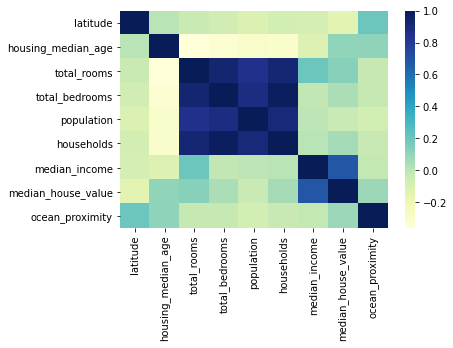

In [17]:
corr = data_df.corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [18]:
data_df.corr()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
latitude,1.000000,0.011399,-0.035165,-0.065210,-0.106251,-0.069326,-0.076014,-0.144143,0.198254
housing_median_age,0.011399,1.000000,-0.361364,-0.324779,-0.295263,-0.307249,-0.112794,0.109763,0.112716
total_rooms,-0.035165,-0.361364,1.000000,0.932408,0.855906,0.920824,0.198769,0.132570,-0.018812
total_bedrooms,-0.065210,-0.324779,0.932408,1.000000,0.878581,0.979994,-0.005643,0.047478,-0.019482
population,-0.106251,-0.295263,0.855906,0.878581,1.000000,0.907529,0.004715,-0.028033,-0.073326
households,-0.069326,-0.307249,0.920824,0.979994,0.907529,1.000000,0.015385,0.062674,-0.022437
median_income,-0.076014,-0.112794,0.198769,-0.005643,0.004715,0.015385,1.000000,0.689593,-0.010845
median_house_value,-0.144143,0.109763,0.132570,0.047478,-0.028033,0.062674,0.689593,1.000000,0.080075
ocean_proximity,0.198254,0.112716,-0.018812,-0.019482,-0.073326,-0.022437,-0.010845,0.080075,1.000000


In [55]:
# Unstack correlation matrix 
corr_df = corr.unstack().reset_index() 
corr_df

# rename columns
corr_df.columns = ['feature_1','feature_2', 'correlation'] 

# sort by correlation
corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

# Remove self correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 
corr_df

,feature_1,feature_2,correlation
48,households,total_bedrooms,0.979994
32,total_bedrooms,households,0.979994
21,total_rooms,total_bedrooms,0.932408
29,total_bedrooms,total_rooms,0.932408
23,total_rooms,households,0.920824
...,...,...,...
46,households,housing_median_age,-0.307249
12,housing_median_age,total_bedrooms,-0.324779
28,total_bedrooms,housing_median_age,-0.324779
11,housing_median_age,total_rooms,-0.361364


In [56]:
diabetes_corr_df = corr_df[corr_df['feature_1'] == 'median_house_value']
diabetes_corr_df

,feature_1,feature_2,correlation
69,median_house_value,median_income,0.689593
65,median_house_value,total_rooms,0.132570
64,median_house_value,housing_median_age,0.109763
71,median_house_value,ocean_proximity,0.080075
68,median_house_value,households,0.062674
66,median_house_value,total_bedrooms,0.047478
67,median_house_value,population,-0.028033
63,median_house_value,latitude,-0.144143


In [19]:
# notre target est corrélée avec median_income

In [20]:
vif_df = pd.DataFrame()
vif_df["vif_index"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df["features"] = X.columns
vif_df

,vif_index,features
0,16.524840,latitude
1,6.999949,housing_median_age
2,28.965718,total_rooms
3,92.953981,total_bedrooms
4,15.729140,population
5,91.584884,households
6,7.358207,median_income
7,1.750236,ocean_proximity


In [21]:
# verifier:households,total_bedrooms,total_rooms,latitude "total_rooms" et "population"

In [22]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=3)

dummy_clf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf.fit(X_train, y_train)

# calculate the score
dummy_clf.score(X_test, y_test)

0.04631707814731687

# Feature Permutation

In [62]:
X=data_df.drop(['median_house_value'],axis=1)
y=data_df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=3)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)
permutation_score = permutation_importance(model, 
                                           X_test, y_test,
                                       
                                           random_state=3,
                                           n_repeats=100) 

# Unstack results
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 

importance_df.columns=['feature','feature importance']

# Order by importance
importance_df.sort_values(by="feature importance", ascending = False) 

,feature,feature importance
6,median_income,1.203886
5,households,0.464425
2,total_rooms,0.317641
4,population,0.306405
3,total_bedrooms,0.235966
1,housing_median_age,0.075677
0,latitude,0.020293
7,ocean_proximity,0.009249


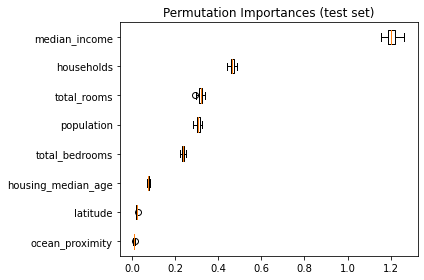

In [63]:

sorted_idx = permutation_score.importances_mean.argsort()  

fig, ax = plt.subplots() 
ax.boxplot(permutation_score.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]) 
ax.set_title("Permutation Importances (test set)") 
fig.tight_layout() 
plt.show()

In [111]:
X=data_df[["median_income","households","total_rooms","total_bedrooms","population"]]
y=data_df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=3)
# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.5326260287149482

In [112]:
X=data_df[["median_income","total_rooms",]]
y=data_df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=3)
# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)



0.4841905059831372

# Outliers

In [23]:
data_df.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1
1,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0
2,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1
3,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0
4,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1


latitude                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
housing_median_age     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
total_rooms            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
total_bedrooms         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
population               AxesSubplot(0.125,0.518913;0.168478x0.16413)
households            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
median_income         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
median_house_value    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
ocean_proximity          AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

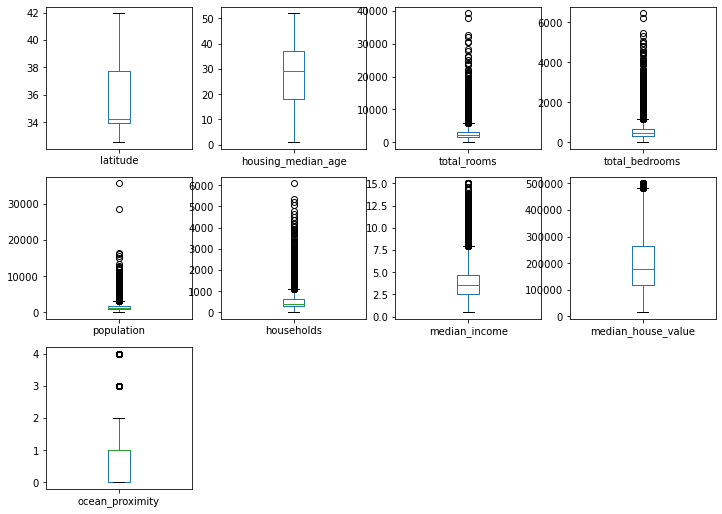

In [24]:
data_df.plot(kind='box', subplots=True, layout=(4, 4), figsize = (12, 12))

<img src="outliers.PNG">

In [30]:
def detect_outliers (df, col):
    q1 = df [col] .quantile (0.25)
    q3 = df [col] .quantile (0,75)
    iqr = q3 - q1
    borne_inférieure = q1 - (1,5 * iqr)
    borne_supérieure = q3 + (1,5 * iqr)
    out_df = df .loc [(df [col]> borne_inférieure) & (df [col] < borne_supérieure)]
    return out_df


In [ ]:
upper_limit=data_df

In [106]:
outliers=[]
def detect_outliers (data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)> threshold:
            outliers.append(i)
    return(outliers)

In [43]:
#detect_outliers(data_df["total_rooms"])

In [44]:
#detect_outliers(data_df["population"])

In [102]:
max_threshold=data_df["median_house_value"].quantile(0.95)
max_threshold

485325.0

In [47]:
min_threshold=data_df["total_rooms"].quantile(0.05)
min_threshold

618.75

In [105]:
data_df[data_df["total_rooms"]<min_threshold]

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
47,32.77,30.0,156.0,45.0,77.0,40.0,3.2679,137500.0,4
75,33.12,46.0,52.0,13.0,59.0,13.0,3.8750,200000.0,0
76,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,4
105,33.80,26.0,239.0,135.0,165.0,112.0,1.3333,187500.0,4
108,33.96,38.0,590.0,139.0,620.0,132.0,2.1731,143800.0,0
...,...,...,...,...,...,...,...,...,...
16443,35.39,52.0,191.0,52.0,106.0,49.0,2.0455,72500.0,1
16456,32.71,35.0,614.0,180.0,691.0,164.0,1.6953,81300.0,4
16477,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,1
16483,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,1


In [104]:
data_df[data_df["total_rooms"]>max_threshold]

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


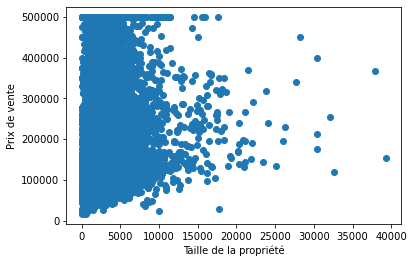

In [54]:
plt.scatter(data_df["total_rooms"], data_df["median_house_value"])
plt.xlabel("Taille de la propriété")
plt.ylabel("Prix de vente")
plt.show()